In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Part 1: Datos

In [2]:
# Load data
iris = load_iris()
X = iris.data
Y = iris.target

print("Data shape:", X.shape)
print("Examples:\n", X[:10])
print("\nLabels shape", Y.shape)
print("Examples:\n", Y)
print("Class names:", iris.target_names)

Data shape: (150, 4)
Examples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Labels shape (150,)
Examples:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class names: ['setosa' 'versicolor' 'virginica']


In [3]:
# Print more info
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

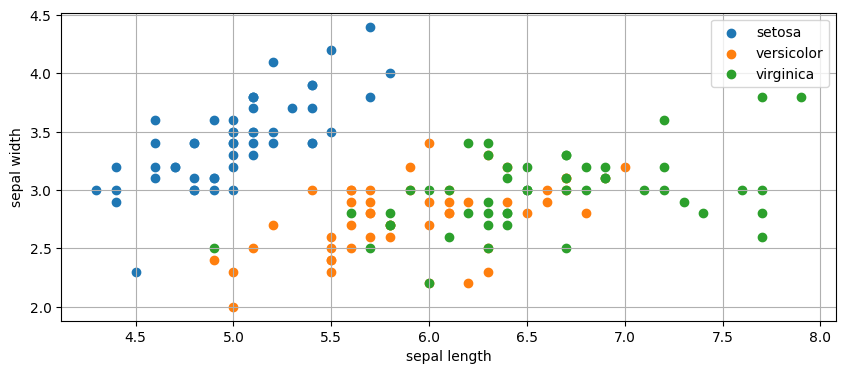

In [4]:
# Plot two features: petal length and petal width
plt.figure(figsize=(10, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label=iris.target_names[0])
plt.scatter(X[Y==1, 0], X[Y==1, 1], label=iris.target_names[1])
plt.scatter(X[Y==2, 0], X[Y==2, 1], label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

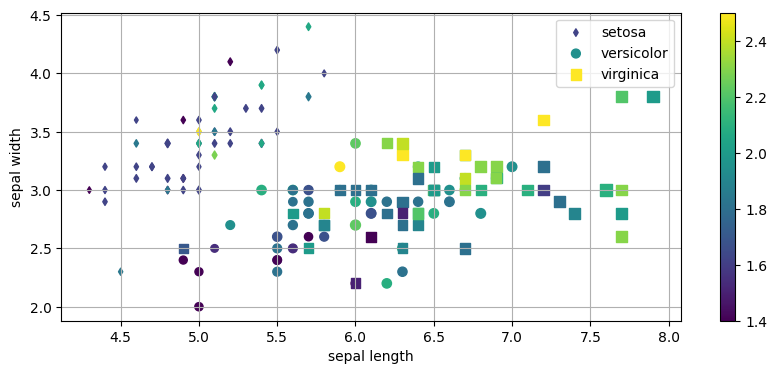

In [6]:
# == Q1: ==
# Idea alguna manera de visualizar y diferenciar las 4 variables al mismo tiempo,
# usando una sola gráfica 2D. Muestra tu solución:
plt.figure(figsize=(10, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=X[Y==0, 2]*10, c=X[Y==0, 3], marker='d', label=iris.target_names[0])
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=X[Y==1, 2]*10, c=X[Y==1, 3], marker='o', label=iris.target_names[1])
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=X[Y==2, 2]*10, c=X[Y==2, 3], marker='s', label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.colorbar()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [7]:
# Let's keep two classes only, and two variables
X = iris.data[:100, :2]
Y = iris.target[:100]

print("Data:", X.shape)
print(X[:10])
print("Labels", Y.shape)
print(Y)

Data: (100, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
Labels (100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
# Split data into training + test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 2)
(10, 2)
(90,)
(10,)


# Part 2: Perceptron

In [9]:
# Define class linear (step) perceptron
class LPerceptron:
  #constructor
  def __init__ (self):
    self.w = None
    self.b = None
  
  #activation function  
  def activation(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  
  #predict on data
  def predict(self, X):
    Y = []
    for x in X:
      result = self.activation(x)
      Y.append(result)
    return np.array(Y)

  #train
  def fit(self, X, Y, n_epochs=1, lr=1, val_split=0.1, verbose=False):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split) #split train into train and val
    
    self.w = np.random.rand(X.shape[1])
    self.b = 0.0
    
    accuracy = np.zeros((2,))
    accuracy[0] = accuracy_score(y_train, self.predict(x_train))
    accuracy[1] = accuracy_score(y_val, self.predict(x_val))
    if verbose:
      print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
    
    accuracy = np.zeros((n_epochs, 2))
    for epoch in range(n_epochs): #loop through epochs
      for x, y in zip(x_train, y_train):  #loop through samples
        y_hat = self.activation(x)
        d_err = y - y_hat
        self.w = self.w + lr * d_err * x  #LA
        self.b = self.b + lr * d_err      #LB
      accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train))
      accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val))
      if verbose:
        print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
        
    return accuracy

### == Q2: ==

**Explica qué sucede en las líneas comentadas como #LA y #LB**

R= Aquí se actualizan los valores de w y b con ayuda del learning rate y el error cometido. 

**¿Qué significa cada térmido de las ecuaciones?**

R= w son los pesos, lr es la tasa de aprendizaje, d_err es el error cometido entre la clase objetivo y la clase predicha, y x es el dato en cuestión. 

**¿Por qué las expresiones contienen el término "err"?**

R= porque los valores tanto de los pesos como de b se actualizan con base en el error cometido

**¿Por qué la expresión en #LA contiene la variable de entrada "x"?**

R= porque la ecuación que actualiza los valores de w resulta una x como parte de la derivada.

**¿Cuántas iteraciones suceden en el loop interno del método fit?**

R= $ n\_epochs * num\_datos $

In [10]:
# Create a model and train it for 50 epochs
perceptron = LPerceptron()
acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.0003, val_split=0.1, verbose=True)
# Encuentra el mejor learning rate lr
new_perceptron = LPerceptron()
acc_history = new_perceptron.fit(x_train, y_train, n_epochs=50, lr=0.0005, val_split=0.1, verbose=True)
# 0.0005 - 0.002

Epoch:   0 -- acc: 0.5062, acc_val: 0.3333
Epoch:   1 -- acc: 0.5062, acc_val: 0.3333
Epoch:   2 -- acc: 0.5062, acc_val: 0.3333
Epoch:   3 -- acc: 0.5062, acc_val: 0.3333
Epoch:   4 -- acc: 0.5062, acc_val: 0.3333
Epoch:   5 -- acc: 0.5062, acc_val: 0.3333
Epoch:   6 -- acc: 0.5062, acc_val: 0.3333
Epoch:   7 -- acc: 0.5062, acc_val: 0.3333
Epoch:   8 -- acc: 0.4568, acc_val: 0.2222
Epoch:   9 -- acc: 0.1481, acc_val: 0.0000
Epoch:  10 -- acc: 0.0864, acc_val: 0.0000
Epoch:  11 -- acc: 0.0741, acc_val: 0.0000
Epoch:  12 -- acc: 0.0741, acc_val: 0.0000
Epoch:  13 -- acc: 0.0741, acc_val: 0.0000
Epoch:  14 -- acc: 0.0741, acc_val: 0.0000
Epoch:  15 -- acc: 0.0741, acc_val: 0.0000
Epoch:  16 -- acc: 0.0741, acc_val: 0.0000
Epoch:  17 -- acc: 0.0741, acc_val: 0.0000
Epoch:  18 -- acc: 0.0617, acc_val: 0.0000
Epoch:  19 -- acc: 0.0864, acc_val: 0.0000
Epoch:  20 -- acc: 0.0741, acc_val: 0.0000
Epoch:  21 -- acc: 0.0617, acc_val: 0.0000
Epoch:  22 -- acc: 0.0864, acc_val: 0.0000
Epoch:  23 

In [11]:
# Making predictions on test data
y_test_hat = perceptron.predict(x_test)
print("Test acc:", accuracy_score(y_test_hat, y_test))

Test acc: 0.3


In [12]:
# Show the final values for the weights and bias
print("Weights:", perceptron.w)
print("bias:", perceptron.b)

Weights: [-0.01688361 -0.01793482]
bias: -0.1460999999999988


In [13]:
# == Q3: ==
# Corre el experimento anterior 100 veces (quizás quieras establecer verbose=False),
# y reporta el promedio +- desviación estándar obtenidos al final de la última época de cada corrida.
# Debes reportar 3 promedios: para training, validation, y test sets
# ¿Notas algún cambio significativo?
ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.002, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.9479 +- 0.0533
Validation:	 0.9478 +- 0.0793
Test:		 0.9900 +- 0.0520


In [14]:
# == Q4: ==
# Repite el experimento anterior pero ahora usando las 4 variables de los datos (en vez de sólo 2)

X = iris.data[:100,]
Y = iris.target[:100,]

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.002, val_split=0.1, verbose=False)
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

(100, 4)
(100,)
Training:	 1.0000 +- 0.0000
Validation:	 0.9933 +- 0.0307
Test:		 1.0000 +- 0.0000


**¿Hubo algún cambio significativo en los resultados obtenidos?**

R= Sí hubo cambio significativo.

**¿Por qué crees que fue esto?**

R= Al usar más variables se logra separar de mejor forma las clases de iris, logrando mayor accuracy. 


In [102]:
# == Q5: ==
# Repite el experimento anterior pero ahora usando las 4 variables de las clases versicolor (1) y virginica (2).

X = iris.data[50:]
Y = iris.target[:100]

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.0018, val_split=0.1, verbose=False) 
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

(100, 4)
(100,)
Training:	 0.8754 +- 0.0613
Validation:	 0.8667 +- 0.1247
Test:		 0.8700 +- 0.1375


**¿Hubo algún cambio significativo en los resultados obtenidos?**

R= El desempeño cae un poco. 

**¿Por qué crees que fue esto?**

R= En la gráfica anterior se observa que los valores de las variables que describen a la clase 1 y clase 2 de iris son muy similares y es más complicado hacer una separación lineal.

**¿Por qué si modificamos los datos, seguimos usando las mismas etiquetas: Y = iris.target[:100]?**

R= Porque solo consideramos dos clases, y es clasificación binaria 0,1.

# Part 3: Non-linear (sigmoid) Perceptron

**Completa el siguiente código del perceptron no lineal (sigmoide)**

In [16]:
# Define class perceptron
class Perceptron:
  #constructor
  def __init__ (self):
    self.W = None
    self.b = None
  
  #total neuron input
  def lin_sum(self, X):
    return np.dot(self.W, X) + self.b
  
  #activation (sigmoid)
  def sigmoid(self, s):
    return 1.0 / (1.0 + np.exp(-s))
  
  #derivative of activation (sigmoid)
  def d_sigmoid(self, s):
    return self.sigmoid(s) * (1.0 - self.sigmoid(s))
  
  #predict on data
  def predict(self, X):
    Y = []
    for x in X:
      s = self.lin_sum(x)
      y = self.sigmoid(s)
      Y.append(y)
    return np.array(Y)

  #train
  def fit(self, X, Y, n_epochs=1, lr=0.1, val_split=0.1, verbose=False):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split)
    
    self.W = np.random.rand(X.shape[1])
    self.b = 0.0
    
    accuracy = np.zeros((2,))
    accuracy[0] = accuracy_score(y_train, self.predict(x_train).round())
    accuracy[1] = accuracy_score(y_val, self.predict(x_val).round())
    if verbose:
      print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
    
    accuracy = np.zeros((n_epochs, 2))
    for epoch in range(n_epochs): #loop through epochs
      for x, y in zip(x_train, y_train):  #loop through samples
        # Forward pass
        s = self.lin_sum(x)
        y_hat = self.sigmoid(s)
        # Backward pass
        d_err = y - y_hat
        self.W = self.W + lr * d_err * self.d_sigmoid(s) * x
        self.b = self.b + lr * d_err * self.d_sigmoid(s)
      accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train).round())
      accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val).round())
      if verbose:
        print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
        
    return accuracy

### == Q6: ==

**Repite el experimento anterior usando las 4 variables de las clases versicolor (1) y virginica (2), pero ahora usando el Perceptron logístico.**

In [26]:
X = iris.data[50:]
Y = iris.target[:100]

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = Perceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.002, val_split=0.1, verbose=False)
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test, y_test_hat.round())
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

(100, 4)
(100,)
Training:	 0.5646 +- 0.1581
Validation:	 0.5433 +- 0.2142
Test:		 0.7650 +- 0.1195


**¿Hubo algún cambio significativo en los resultados obtenidos?**

R= sí hubo un cambio. 

**¿Por qué crees que fue esto?**

R= ahora se usa una función sigmoide para hacer la separación lineal, idealmente debería facilitar la separación pero no lo hace. 

# Part 4: Sklearn Perceptron

In [111]:
# Manually divide train, val, y test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [112]:
# Use perceptron from scikit-learn
from sklearn.linear_model import Perceptron
sk_perceptron = Perceptron(max_iter=50, eta0=0.003)
sk_perceptron.fit(x_train, y_train)

Perceptron(eta0=0.003, max_iter=50)

In [113]:
# Print performance
print(f"Training:\t {sk_perceptron.score(x_train, y_train):.4f}")
print(f"Validation:\t {sk_perceptron.score(x_val, y_val):.4f}")
print(f"Test:\t\t {sk_perceptron.score(x_test, y_test):.4f}")

Training:	 0.8148
Validation:	 0.7778
Test:		 0.8000
